In [1]:
import torch
torch.__version__

'2.3.0+cu121'

In [2]:
import os#
os.chdir('/home/mohammed/Work/STK_search')
#os.chdir("/rds/general/user/ma11115/home/STK_Search/STK_search")
from pathlib import Path#

import pandas as pd
import torch


import numpy as np
from stk_search.utils.config_utils import read_config, save_config
from stk_search.utils import update_datasets
import importlib
importlib.reload(update_datasets)
os.makedirs('data/output/search_experiment/search_exp_database', exist_ok=True)

In [3]:
# load Search space and check conditions
import pickle
search_space_loc = "data/input/STK_search_space/search_space_test.pkl"

save_dir = 'data/input/STK_search_space'
id = 'test'
SP = pickle.load(open(save_dir+f'/search_space_{id}.pkl', 'rb'))
SP.update()
print(SP.syntax)
print(SP.conditions_list)
print(f"size of the search space is : {SP.get_space_size():.2e}")
SP.df_precursors.head()

[0, 1, 2, 3, 4, 5]
[[], [], [], [], [], []]
size of the search space is : 1.86e+14


,InChIKey,Atom_num,HOMO (eV),LUMO (eV),HOMO_LUMO_GAP (eV),IP (eV),EA (eV),total energy (eV) vipea,First excited state Energy (eV),First excited osc,...,pca8,pca9,mol_opt_smiles,mol_org,mol_org_smile,ECFP,num_atoms,num_rings,cluster,orgcluster
0,KYORXLIHDAZXPK-UHFFFAOYSA-N,25,-11.5745,-10.1316,1.442883,7.1531,3.8935,-1699.611759,"[2.97, 3.437, 3.827, 3.901, 4.181]","[0.1323, 0.3332, 0.001, 0.4911, 0.5211]",...,-0.561829,1.909060,<rdkit.Chem.rdchem.Mol object at 0x72195f6813b0>,<rdkit.Chem.rdchem.Mol object at 0x72195f537a90>,C=C1C(=O)c2c(sc3ccccc23)C1=C(C#N)C#N,"[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, ...",25.0,3.0,0,0
2,UVCFYBOLMFIWGF-FPYGCLRLSA-N,22,-11.6536,-9.8300,1.823610,7.5190,4.1701,-1426.075709,"[3.543, 3.828, 3.987, 4.107, 4.23]","[0.0026, 0.1704, 0.206, 0.2256, 0.0395]",...,3.484916,0.540030,<rdkit.Chem.rdchem.Mol object at 0x72195f681e50>,<rdkit.Chem.rdchem.Mol object at 0x72195f537ae0>,[H]/C=C1\C(=O)c2c(F)cccc2C1=C(C#N)C#N,"[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",22.0,2.0,0,2
3,PQZAHLJJGPAGBD-OQFOIZHKSA-N,22,-11.5774,-9.8714,1.706007,7.5324,4.1806,-1426.205720,"[3.779, 3.813, 4.035, 4.115, 4.429]","[0.0002, 0.0277, 0.1648, 0.3408, 0.0013]",...,8.579813,1.014201,<rdkit.Chem.rdchem.Mol object at 0x72195f681ea0>,<rdkit.Chem.rdchem.Mol object at 0x72195f537b30>,[H]/C=C1\C(=O)c2ccc(F)cc2C1=C(C#N)C#N,"[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",22.0,2.0,0,3
4,HFUBKQHDPJZQIW-UHFFFAOYSA-N,13,-11.6185,-9.5986,2.019861,7.7105,3.7821,-1085.337355,"[4.436, 4.438, 5.127, 5.751, 5.826]","[0.2419, 0.2902, 0.0, 0.0, 0.0098]",...,2.916314,1.085874,<rdkit.Chem.rdchem.Mol object at 0x72195f681ef0>,<rdkit.Chem.rdchem.Mol object at 0x72195f537b80>,Fc1cc2c(cc1F)N=S=N2,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",13.0,2.0,1,4
5,XORWEKRDQCXPID-UHFFFAOYSA-N,28,-11.3061,-9.1919,2.114258,7.1941,3.5724,-1474.375137,"[3.81, 3.855, 4.251, 4.645, 4.799]","[0.1441, 0.2486, 0.0869, 0.0024, 0.0025]",...,3.638328,0.097783,<rdkit.Chem.rdchem.Mol object at 0x72195f681f40>,<rdkit.Chem.rdchem.Mol object at 0x72195f537bd0>,CCN1C(=O)c2cccc3cccc(c23)C1=O,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",28.0,3.0,1,5


In [6]:
from stk_search.Objective_function import  Look_up_table
df_total_path = "data/Full_dataset/New_target07072024.csv"
df_total = pd.read_csv(df_total_path)
oligomer_size = 6
target_name = 'target'
aim = 'maximise'
df_total['target'] = (
        -np.abs(df_total["ES1"] - 3)
        - np.abs(df_total["ionisation potential (eV)"] - 5.5)
        + np.log10(df_total["fosc1"])
    )
df_total.to_csv(df_total_path, index=False)
# define the evaluation function
objective_function = Look_up_table(
            df_total, oligomer_size, target_name=target_name, aim=aim
        )

In [ ]:
# test evaluation function
molecule_id = 0
molecule_properties = SP.check_df_for_element_from_SP(df_total).iloc[[molecule_id]]
print(molecule_properties['InChIKey'])
molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]]
objective_function.evaluate_element(molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]])

0    AAAIKLIUXQWZQC-SBRRWJCQSA-N
Name: InChIKey, dtype: object


(-3.0251355934769806, 'AAAIKLIUXQWZQC-SBRRWJCQSA-N')

In [553]:
# initialise search algorithm 
from stk_search.Search_algorithm import BayesianOptimisation
from stk_search.Search_algorithm import Ea_surrogate

from stk_search.Search_algorithm.Search_algorithm import evolution_algorithm
from stk_search.Search_algorithm import Search_algorithm
importlib.reload(Search_algorithm)
importlib.reload(Ea_surrogate)
importlib.reload(BayesianOptimisation)
which_acquisition = 'EI'
lim_counter = 10
BO_learned = BayesianOptimisation.BayesianOptimisation(which_acquisition=which_acquisition, lim_counter=lim_counter)
EA = Search_algorithm.evolution_algorithm()
SUEA = Ea_surrogate.Ea_surrogate()
BO_Mord = BayesianOptimisation.BayesianOptimisation(which_acquisition=which_acquisition, lim_counter=lim_counter)

In [584]:
# load the representation and the model 
from stk_search.Search_algorithm import Ea_surrogate

from stk_search.Representation import  Representation_poly_3d
import importlib
importlib.reload(Representation_poly_3d)
from stk_search.geom3d import pl_model
import torch.nn.functional as Functional
from stk_search.geom3d import train_models
from stk_search.Representation import  Representation_poly_3d

import importlib
importlib.reload(Representation_poly_3d)
importlib.reload(Ea_surrogate)


#config_dir = "/rds/general/user/ma11115/home/STK_Search/STK_search/data/representation_learning/6-frag/target/240430/SchNet/splitrand-nummol68864/Emb_dim_12"
config_dir = "data/representation_learning//6-frag/target/240726//SchNet/splitrand-nummol5000/"
config, min_val_loss = train_models.get_best_embedding_model(config_dir)

SUEA = Ea_surrogate.Ea_surrogate()
SUEA.config_dir = config_dir
SUEA.load_representation_model()
BO_learned.config_dir = config_dir
BO_learned.load_representation_model()


config loaded from data/representation_learning//6-frag/target/240726//SchNet/splitrand-nummol5000/
data/representation_learning//6-frag/target/240726//SchNet/splitrand-nummol5000/epoch=6-val_loss=0.25-other_metric=0.00.ckpt
config loaded from data/representation_learning//6-frag/target/240726//SchNet/splitrand-nummol5000/
Model loaded:  SchNet
config loaded from data/representation_learning//6-frag/target/240726//SchNet/splitrand-nummol5000/
Model loaded:  SchNet


(<stk_search.Representation.Representation_poly_3d.Representation_poly_3d at 0x721825000100>,
 Pymodel_new(
   (molecule_3D_repr): SchNet(hidden_channels=128, num_filters=128, num_interactions=8, num_gaussians=51, cutoff=6)
   (graph_pred_linear): Linear(in_features=128, out_features=1, bias=True)
   (transform_to_opt): Linear(in_features=128, out_features=128, bias=True)
 ))

In [585]:
# initialise the representation of the molecules used
# here we use the dataframe of the precursors that has PCA of desrciprtors calculated using mordred
from stk_search.Representation import (
    Representation_from_fragment,
    Representation_3d_from_fragment,
)

df_representation_path = "data/Prescursor_data/df_mordred_10072024.pkl"
df_representation = pd.read_pickle(df_representation_path)
df_representation.dropna(axis=1, inplace=True)
# check if the representation dataframe contains all the elements in teh search space
print(
    "number of element not in the representation dataframe ",
    -(SP.df_precursors["InChIKey"].isin(df_representation["InChIKey"]).sum()
    - SP.df_precursors.shape[0]),
)
if -(SP.df_precursors["InChIKey"].isin(df_representation["InChIKey"]).sum() - SP.df_precursors.shape[0]) > 0:
    SP.df_precursors = SP.df_precursors[SP.df_precursors["InChIKey"].isin(df_representation["InChIKey"])]
    with open(search_space_loc, "wb") as f:
        pickle.dump(SP, f)
frag_properties = df_representation.select_dtypes(include=[np.number]).columns
print(frag_properties)
BO_Mord.Representation = Representation_from_fragment.Representation_from_fragment(
    df_representation, frag_properties
)


number of element not in the representation dataframe  0
Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9'],
      dtype='object')


In [586]:
# test representation

molecule_id = 0
molecule_properties = SP.check_df_for_element_from_SP(df_total).iloc[[molecule_id]]
print(molecule_properties['InChIKey'])
molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]]
X_rpr = SUEA.Representation.generate_repr(molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]])
print(X_rpr)
X_rpr = BO_learned.Representation.generate_repr(molecule_properties[[f'InChIKey_{x}' for x in range(oligomer_size)]])

1    AAALPPGKJQYWNO-NOPDUFPGSA-N
Name: InChIKey, dtype: object


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 0.0275,  0.0820, -0.1516,  0.0674, -0.3031,  0.0913, -0.1393,  0.3391,
         -0.4593, -0.1130, -0.1284,  0.1396, -0.0595, -0.2241,  0.1550, -0.0926,
         -0.1696,  0.1728, -0.2951, -0.0747,  0.4054,  0.0066, -0.4321, -0.2202,
         -0.1451, -0.1414, -0.3035, -0.1777,  0.3847,  0.5285,  0.0600, -0.1541,
          0.2574,  0.0569, -0.0825,  0.2275, -0.4752,  0.1922, -0.2855,  0.3261,
          0.0462, -0.0641, -0.2083, -0.1360, -0.2742, -0.2875,  0.5056, -0.0575,
          0.4322, -0.1054,  0.0386,  0.2309,  0.2772,  0.6248, -0.0165, -0.0329,
         -0.1092, -0.4694, -0.1329,  0.4207, -0.1565,  0.1128,  0.3260,  0.2302,
         -0.0478,  0.0820,  0.3135,  0.3259, -0.4335,  0.3931, -0.3818, -0.1310,
         -0.0871, -0.2100, -0.3258,  0.3088,  0.2595,  0.2898,  0.0777,  0.4286,
          0.0091,  0.1140,  0.1848,  0.4993,  0.2314,  0.1655, -0.0256,  0.1775,
         -0.2790,  0.5883, -0.1826, -0.0053, -0.2362, -0.4164, -0.3960,  0.2435,
          0.0759, -0.0149,  

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [649]:
from stk_search import SearchExp

importlib.reload(SearchExp)


# set experiment conditions
def define_and_run_search(
    search_algorithm=EA,
    num_elem_initialisation=50,
    num_iteration=20,
    number_of_iterations=num_iteration,
    verbose=True,
):

    S_exp = SearchExp.SearchExp(
        SP,
        search_algorithm,
        objective_function,
        number_of_iterations,
        verbose=verbose,
    )
    test_name = "test"
    benchmark = True
    S_exp.output_folder = (
        f"data/output/search_experiment/{oligomer_size}_frag/" + test_name
    )
    S_exp.num_elem_initialisation = num_elem_initialisation
    S_exp.benchmark = benchmark
    S_exp.df_total = df_total
    # Save search inputs
    import json
    import subprocess

    def save_run_search_inputs(inputs, save_path="run_search_new_inputs.json"):
        # Get the current git version
        git_version = (
            subprocess.check_output(["git", "rev-parse", "HEAD"])
            .strip()
            .decode("utf-8")
        )

        # Add the git version to the inputs
        inputs["git_version"] = git_version

        # Save the inputs to a file
        with open(save_path, "w") as f:
            json.dump(inputs, f)

        print("Inputs saved.")

    input_json = {}
    input_json["search_space_loc"] = search_space_loc
    input_json["search_algorithm"] = search_algorithm.name
    input_json["objective_function"] = objective_function.__str__()
    input_json["number_of_iterations"] = number_of_iterations
    input_json["verbose"] = verbose
    input_json["num_elem_initialisation"] = num_elem_initialisation
    input_json["benchmark"] = benchmark
    input_json["df_total"] = df_total_path
    input_json["df_representation"] = df_representation_path
    input_json["frag_properties"] = list(frag_properties)
    input_json["which_acquisition"] = which_acquisition
    input_json["run_search_name"] = S_exp.search_exp_name
    input_json["search_output_folder"] = S_exp.output_folder
    input_json["date"] = S_exp.date
    input_json["oligomer_size"] = oligomer_size
    input_json["config_dir"] = config_dir
    save_path = f"data/output/search_experiment/search_exp_database/{S_exp.search_exp_name}.json"
    os.makedirs(
        "data/output/search_experiment/search_exp_database", exist_ok=True
    )
    save_run_search_inputs(input_json, save_path)
    S_exp.run_seach()
    return max(S_exp.ids_acquired)

In [650]:
define_and_run_search(search_algorithm=EA)

Inputs saved.
element Inchikey suggested: DUPCUMATAOYCNW-UHFFFAOYSA-N, Eval: -1.3804317275402906
element Inchikey suggested: XEUPAZJFLJUXOY-UHFFFAOYSA-N, Eval: -2.475132642151542
element Inchikey suggested: VDDPLJSRHZCQKN-WYMKRNKVSA-N, Eval: -0.3754104237375525
element Inchikey suggested: PUPORGXYUOXLEN-IDAYOUIPSA-N, Eval: -0.5886452390898805
element Inchikey suggested: DJXNMDBQWOMYSM-BXVAPQLOSA-N, Eval: -1.4686514392806562
element Inchikey suggested: MBCSWOGTJYTQTP-RQPGLINKSA-N, Eval: -1.1249302437789392
element Inchikey suggested: FNYHIWBJMXTBCK-KIBLKLHPSA-N, Eval: -2.0986392354737577
element Inchikey suggested: FRWWGGKSDKCCBY-UHFFFAOYSA-N, Eval: -0.19326879971134736
element Inchikey suggested: IEJHAAMFNOFELM-UHFFFAOYSA-N, Eval: -2.82818733218585
element Inchikey suggested: DISFVHNRZVNPMA-UHFFFAOYSA-N, Eval: -0.22166979440866963
element Inchikey suggested: BTQPTJMMNIVKSF-UHFFFAOYSA-N, Eval: -1.034425714300444
element Inchikey suggested: VJCSLPQRLCVPRY-OUUCWOCCSA-N, Eval: -0.580791213

69

In [651]:
define_and_run_search(search_algorithm=SUEA)

Inputs saved.
element Inchikey suggested: LQUUOYDLTAAZFO-PORAZQCPSA-N, Eval: -0.6713622713665888
element Inchikey suggested: QRQCVOVCAUTWIG-COOGGDMOSA-N, Eval: -1.272517322798027
element Inchikey suggested: VMRSOZKFPXFASG-JBQXKKLXSA-N, Eval: -0.3563317070414882
element Inchikey suggested: LPIIUTDIHLVVNQ-UHFFFAOYSA-N, Eval: -3.4454416512809245
element Inchikey suggested: BVMYQLVUZXEMKF-UHFFFAOYSA-N, Eval: 0.2844852130789256
element Inchikey suggested: GPCUXUYSAAEZIH-FDVSRXAVSA-N, Eval: -1.9418248524089767
element Inchikey suggested: DIENIOLNTBQPFY-KPGMTVGESA-N, Eval: -0.21740855002152137
element Inchikey suggested: DZZQIFSWRFTBEJ-IPPBACCNSA-N, Eval: -2.7046741428068772
element Inchikey suggested: BKHYHRCTRYNSSS-UHFFFAOYSA-N, Eval: -1.4890483519174813
element Inchikey suggested: QNDVCLUEQVXEMT-BWVPEESFSA-N, Eval: -2.4483846478455917
element Inchikey suggested: YZXARELSGCCXFO-UHFFFAOYSA-N, Eval: -1.7681147870131797
element Inchikey suggested: HBDQUSCALXEWCG-UHFFFAOYSA-N, Eval: 0.464065558

Pandas Apply:   0%|          | 0/103 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/28 [00:00<?, ?it/s]

new_element_df shape is  (103, 6)
20
element Inchikey suggested: XOPRDXOQZUEXGS-UHFFFAOYSA-N, Eval: 0.2662221773152229
iteration 0 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.2662221773152229


Pandas Apply:   0%|          | 0/214 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/122 [00:00<?, ?it/s]

new_element_df shape is  (214, 6)
19
element Inchikey suggested: MJADDENYAUHALA-UHFFFAOYSA-N, Eval: 0.43831658385436134
iteration 1 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.43831658385436134


Pandas Apply:   0%|          | 0/111 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16 [00:00<?, ?it/s]

new_element_df shape is  (111, 6)
2
element Inchikey suggested: MLPLEGIPIATRLG-UHFFFAOYSA-N, Eval: 0.27292315418197854
iteration 2 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.27292315418197854


Pandas Apply:   0%|          | 0/142 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/18 [00:00<?, ?it/s]

new_element_df shape is  (142, 6)
0
element Inchikey suggested: YGXDTFFXNJFBRO-UHFFFAOYSA-N, Eval: 0.3994611112894675
iteration 3 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.3994611112894675


Pandas Apply:   0%|          | 0/174 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/72 [00:00<?, ?it/s]

new_element_df shape is  (174, 6)
8
element Inchikey suggested: NYZQVUIHMYOWJL-UHFFFAOYSA-N, Eval: 0.288540026345397
iteration 4 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.288540026345397


Pandas Apply:   0%|          | 0/141 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

new_element_df shape is  (141, 6)
28
element Inchikey suggested: SSVNMUBRZLPETH-UHFFFAOYSA-N, Eval: 0.27033837607008204
iteration 5 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.27033837607008204


Pandas Apply:   0%|          | 0/110 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

new_element_df shape is  (110, 6)
15
element Inchikey suggested: PNKVFFUNHABLRK-UHFFFAOYSA-N, Eval: 0.34747790910696874
iteration 6 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.34747790910696874


Pandas Apply:   0%|          | 0/127 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/12 [00:00<?, ?it/s]

new_element_df shape is  (127, 6)
17
element Inchikey suggested: XRZYWFDYTMJRLN-UHFFFAOYSA-N, Eval: 0.2803516257858216
iteration 7 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.2803516257858216


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

new_element_df shape is  (116, 6)
16
element Inchikey suggested: NYSJVXURNRXEJM-UHFFFAOYSA-N, Eval: 0.29737220918493057
iteration 8 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.29737220918493057


Pandas Apply:   0%|          | 0/401 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/124 [00:00<?, ?it/s]

new_element_df shape is  (401, 6)
183
element Inchikey suggested: SJUCNTLDLHHOHH-UHFFFAOYSA-N, Eval: 0.3210776615102565
iteration 9 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.3210776615102565


Pandas Apply:   0%|          | 0/251 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

new_element_df shape is  (251, 6)
49
element Inchikey suggested: WTVHZZSETLLXOV-UHFFFAOYSA-N, Eval: 0.2699205314617007
iteration 10 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.2699205314617007


Pandas Apply:   0%|          | 0/106 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

new_element_df shape is  (106, 6)
19
element Inchikey suggested: BSNZQXACJZEOID-UHFFFAOYSA-N, Eval: 0.371235675751987
iteration 11 completed
max fitness acquired: 0.5052561899606678
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.371235675751987


Pandas Apply:   0%|          | 0/176 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/29 [00:00<?, ?it/s]

new_element_df shape is  (176, 6)
11
element Inchikey suggested: LGCXGRIJGKYJDP-UHFFFAOYSA-N, Eval: 0.637936021882021
iteration 12 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.637936021882021


Pandas Apply:   0%|          | 0/432 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/92 [00:00<?, ?it/s]

new_element_df shape is  (432, 6)
24
element Inchikey suggested: GCICEPHMCRXIIN-UHFFFAOYSA-N, Eval: 0.24378336403873457
iteration 13 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.24378336403873457


Pandas Apply:   0%|          | 0/221 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

new_element_df shape is  (221, 6)
27
element Inchikey suggested: OSRUJRDFJZLTBP-UHFFFAOYSA-N, Eval: 0.361535095674547
iteration 14 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.361535095674547


Pandas Apply:   0%|          | 0/230 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

new_element_df shape is  (230, 6)
130
element Inchikey suggested: CMPOWGWHVBEYTL-UHFFFAOYSA-N, Eval: 0.3685485572812317
iteration 15 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.3685485572812317


Pandas Apply:   0%|          | 0/235 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

new_element_df shape is  (235, 6)
155
element Inchikey suggested: WGUOPLMCDRNVNV-UHFFFAOYSA-N, Eval: 0.36345222160776003
iteration 16 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.36345222160776003


Pandas Apply:   0%|          | 0/319 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

new_element_df shape is  (319, 6)
197
element Inchikey suggested: WZTNWTIILGPEJP-UHFFFAOYSA-N, Eval: 0.5677016636292351
iteration 17 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.5677016636292351


Pandas Apply:   0%|          | 0/358 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/24 [00:00<?, ?it/s]

new_element_df shape is  (358, 6)
7
element Inchikey suggested: CAHZWZYHUFJRAP-UHFFFAOYSA-N, Eval: 0.2765453607723556
iteration 18 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.2765453607723556


Pandas Apply:   0%|          | 0/297 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

new_element_df shape is  (297, 6)
18
element Inchikey suggested: XQGPRKAQEHJIOJ-UHFFFAOYSA-N, Eval: 0.20689057908396147
iteration 19 completed
max fitness acquired: 0.637936021882021
min fitness acquired: -3.4454416512809245
new fitness acquired: 0.20689057908396147


69

In [652]:
define_and_run_search(search_algorithm=BO_learned)

Inputs saved.
element Inchikey suggested: SYYXLDZARWYYJR-PNQUVVCRSA-N, Eval: -1.6790533843925946
element Inchikey suggested: JKKQLOHXZAFVJA-UHFFFAOYSA-N, Eval: -1.9025832997223455
element Inchikey suggested: SKPZIJAZIHEADN-UHFFFAOYSA-N, Eval: -2.5837688203476077
element Inchikey suggested: KZURDLDUMFHKRE-UHFFFAOYSA-N, Eval: -1.0664341045960084
element Inchikey suggested: WYWDVYBXPHPYIN-UHFFFAOYSA-N, Eval: 0.38005464337027484
element Inchikey suggested: KTOOVNCARMXCFZ-UHFFFAOYSA-N, Eval: -0.6569905837375207
element Inchikey suggested: HFWAUAKXRXQIKI-UHFFFAOYSA-N, Eval: 0.19658929668472536
element Inchikey suggested: CMTZEQXKHIJDDD-WWXMDWTASA-N, Eval: -0.9788570616205511
element Inchikey suggested: UESPZTWTMZCSJZ-UHFFFAOYSA-N, Eval: -0.1251577380996728
element Inchikey suggested: YCHFHXKAHFUWCX-YLYVUXRMSA-N, Eval: -2.141844625347532
element Inchikey suggested: GLOPEHVGCYZGPV-WOQZLCCUSA-N, Eval: -1.7109264813772693
element Inchikey suggested: NKYYYDWTDUPPCE-LLJCYPMUSA-N, Eval: -2.28854288

Pandas Apply:   0%|          | 0/50 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/44 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/86 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/27 [00:00<?, ?it/s]

size of representation dataset  2041


Pandas Apply:   0%|          | 0/115 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  2049


Pandas Apply:   0%|          | 0/146 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

size of representation dataset  2064


Pandas Apply:   0%|          | 0/160 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2070


Pandas Apply:   0%|          | 0/176 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16 [00:00<?, ?it/s]

size of representation dataset  2086


Pandas Apply:   0%|          | 0/297 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2089


Pandas Apply:   0%|          | 0/297 [00:00<?, ?it/s]

size of representation dataset  2089


Pandas Apply:   0%|          | 0/298 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2090


Pandas Apply:   0%|          | 0/302 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2094


Pandas Apply:   0%|          | 0/303 [00:00<?, ?it/s]

size of representation dataset  2094


Pandas Apply:   0%|          | 0/304 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2095
element Inchikey suggested: MSAAFKOGHJAYBV-UHFFFAOYSA-N, Eval: 0.07479926401428372
iteration 0 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.07479926401428372


Pandas Apply:   0%|          | 0/51 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/102 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

size of representation dataset  2112


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

size of representation dataset  2112


Pandas Apply:   0%|          | 0/134 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2116


Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

size of representation dataset  2131


Pandas Apply:   0%|          | 0/195 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2132


Pandas Apply:   0%|          | 0/197 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2134


Pandas Apply:   0%|          | 0/203 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  2139


Pandas Apply:   0%|          | 0/228 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/12 [00:00<?, ?it/s]

size of representation dataset  2151


Pandas Apply:   0%|          | 0/229 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2152


Pandas Apply:   0%|          | 0/236 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2156


Pandas Apply:   0%|          | 0/260 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/23 [00:00<?, ?it/s]

size of representation dataset  2179


Pandas Apply:   0%|          | 0/265 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2180


Pandas Apply:   0%|          | 0/292 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/27 [00:00<?, ?it/s]

size of representation dataset  2207


Pandas Apply:   0%|          | 0/344 [00:00<?, ?it/s]

size of representation dataset  2207
element Inchikey suggested: AAQQFGNZZGGQAX-UHFFFAOYSA-N, Eval: 0.25527100978640793
iteration 1 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.25527100978640793


Pandas Apply:   0%|          | 0/52 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/82 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2213


Pandas Apply:   0%|          | 0/105 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  2220


Pandas Apply:   0%|          | 0/137 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  2225


Pandas Apply:   0%|          | 0/192 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2229


Pandas Apply:   0%|          | 0/216 [00:00<?, ?it/s]

size of representation dataset  2229


Pandas Apply:   0%|          | 0/217 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2230


Pandas Apply:   0%|          | 0/246 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/27 [00:00<?, ?it/s]

size of representation dataset  2257


Pandas Apply:   0%|          | 0/253 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  2262


Pandas Apply:   0%|          | 0/256 [00:00<?, ?it/s]

size of representation dataset  2262


Pandas Apply:   0%|          | 0/257 [00:00<?, ?it/s]

size of representation dataset  2262


Pandas Apply:   0%|          | 0/257 [00:00<?, ?it/s]

size of representation dataset  2262


Pandas Apply:   0%|          | 0/258 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2263


Pandas Apply:   0%|          | 0/266 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  2271
element Inchikey suggested: ZUFXXMAWXLFSOO-UHFFFAOYSA-N, Eval: -0.03385594789991653
iteration 2 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: -0.03385594789991653


Pandas Apply:   0%|          | 0/53 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2274


Pandas Apply:   0%|          | 0/97 [00:00<?, ?it/s]

size of representation dataset  2274


Pandas Apply:   0%|          | 0/101 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2278


Pandas Apply:   0%|          | 0/116 [00:00<?, ?it/s]

size of representation dataset  2278


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2280


Pandas Apply:   0%|          | 0/133 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  2289


Pandas Apply:   0%|          | 0/134 [00:00<?, ?it/s]

size of representation dataset  2289


Pandas Apply:   0%|          | 0/151 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/17 [00:00<?, ?it/s]

size of representation dataset  2306


Pandas Apply:   0%|          | 0/237 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/85 [00:00<?, ?it/s]

size of representation dataset  2391


Pandas Apply:   0%|          | 0/350 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2397


Pandas Apply:   0%|          | 0/352 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2399


Pandas Apply:   0%|          | 0/353 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2400


Pandas Apply:   0%|          | 0/357 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2403
element Inchikey suggested: COSXQYKDGPXWAW-UHFFFAOYSA-N, Eval: 0.3144651836210839
iteration 3 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.3144651836210839


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/91 [00:00<?, ?it/s]

size of representation dataset  2403


Pandas Apply:   0%|          | 0/102 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2405


Pandas Apply:   0%|          | 0/117 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/14 [00:00<?, ?it/s]

size of representation dataset  2419


Pandas Apply:   0%|          | 0/120 [00:00<?, ?it/s]

size of representation dataset  2419


Pandas Apply:   0%|          | 0/125 [00:00<?, ?it/s]

size of representation dataset  2419


Pandas Apply:   0%|          | 0/148 [00:00<?, ?it/s]

size of representation dataset  2419


Pandas Apply:   0%|          | 0/148 [00:00<?, ?it/s]

size of representation dataset  2419


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  2426


Pandas Apply:   0%|          | 0/161 [00:00<?, ?it/s]

size of representation dataset  2426


Pandas Apply:   0%|          | 0/277 [00:00<?, ?it/s]

size of representation dataset  2426


Pandas Apply:   0%|          | 0/282 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2429
element Inchikey suggested: VZXUOVKUEQGMJK-UHFFFAOYSA-N, Eval: 0.34006574856421135
iteration 4 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.34006574856421135


Pandas Apply:   0%|          | 0/55 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/78 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2431


Pandas Apply:   0%|          | 0/90 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2434


Pandas Apply:   0%|          | 0/97 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/165 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/166 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/170 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/208 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/208 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/208 [00:00<?, ?it/s]

size of representation dataset  2435


Pandas Apply:   0%|          | 0/218 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  2443
element Inchikey suggested: RBGNKNDHIPAEES-UHFFFAOYSA-N, Eval: 0.27496098535765146
iteration 5 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.27496098535765146


Pandas Apply:   0%|          | 0/56 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/75 [00:00<?, ?it/s]

size of representation dataset  2443


Pandas Apply:   0%|          | 0/88 [00:00<?, ?it/s]

size of representation dataset  2443


Pandas Apply:   0%|          | 0/133 [00:00<?, ?it/s]

size of representation dataset  2443


Pandas Apply:   0%|          | 0/139 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2449


Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

size of representation dataset  2449


Pandas Apply:   0%|          | 0/149 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2450


Pandas Apply:   0%|          | 0/225 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/75 [00:00<?, ?it/s]

size of representation dataset  2525


Pandas Apply:   0%|          | 0/234 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2526


Pandas Apply:   0%|          | 0/238 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2529


Pandas Apply:   0%|          | 0/240 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2531


Pandas Apply:   0%|          | 0/246 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2537
element Inchikey suggested: GEVCBMILMKCVCV-UHFFFAOYSA-N, Eval: 0.34305947045485496
iteration 6 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.34305947045485496


Pandas Apply:   0%|          | 0/57 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/87 [00:00<?, ?it/s]

size of representation dataset  2537


Pandas Apply:   0%|          | 0/99 [00:00<?, ?it/s]

size of representation dataset  2537


Pandas Apply:   0%|          | 0/108 [00:00<?, ?it/s]

size of representation dataset  2537


Pandas Apply:   0%|          | 0/115 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2541


Pandas Apply:   0%|          | 0/126 [00:00<?, ?it/s]

size of representation dataset  2541


Pandas Apply:   0%|          | 0/135 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2543


Pandas Apply:   0%|          | 0/139 [00:00<?, ?it/s]

size of representation dataset  2543


Pandas Apply:   0%|          | 0/139 [00:00<?, ?it/s]

size of representation dataset  2543


Pandas Apply:   0%|          | 0/153 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  2551


Pandas Apply:   0%|          | 0/157 [00:00<?, ?it/s]

size of representation dataset  2551


Pandas Apply:   0%|          | 0/158 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2552


Pandas Apply:   0%|          | 0/159 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2553
element Inchikey suggested: YMYBDFLDLQKZFI-UHFFFAOYSA-N, Eval: 0.07969829217615532
iteration 7 completed
max fitness acquired: 0.38005464337027484
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.07969829217615532


Pandas Apply:   0%|          | 0/58 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/85 [00:00<?, ?it/s]

size of representation dataset  2553


Pandas Apply:   0%|          | 0/86 [00:00<?, ?it/s]

size of representation dataset  2553


Pandas Apply:   0%|          | 0/89 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2556


Pandas Apply:   0%|          | 0/95 [00:00<?, ?it/s]

size of representation dataset  2556


Pandas Apply:   0%|          | 0/186 [00:00<?, ?it/s]

size of representation dataset  2556


Pandas Apply:   0%|          | 0/228 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/25 [00:00<?, ?it/s]

size of representation dataset  2581


Pandas Apply:   0%|          | 0/234 [00:00<?, ?it/s]

size of representation dataset  2581


Pandas Apply:   0%|          | 0/298 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/60 [00:00<?, ?it/s]

size of representation dataset  2641


Pandas Apply:   0%|          | 0/304 [00:00<?, ?it/s]

size of representation dataset  2641


Pandas Apply:   0%|          | 0/310 [00:00<?, ?it/s]

size of representation dataset  2641


Pandas Apply:   0%|          | 0/316 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2647
element Inchikey suggested: VOHUGKLZFBSYQF-UHFFFAOYSA-N, Eval: 0.39645210044783696
iteration 8 completed
max fitness acquired: 0.39645210044783696
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.39645210044783696


Pandas Apply:   0%|          | 0/59 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/130 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2649


Pandas Apply:   0%|          | 0/138 [00:00<?, ?it/s]

size of representation dataset  2649


Pandas Apply:   0%|          | 0/168 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2650


Pandas Apply:   0%|          | 0/242 [00:00<?, ?it/s]

size of representation dataset  2650


Pandas Apply:   0%|          | 0/246 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2652


Pandas Apply:   0%|          | 0/277 [00:00<?, ?it/s]

size of representation dataset  2652


Pandas Apply:   0%|          | 0/287 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  2662


Pandas Apply:   0%|          | 0/313 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  2669


Pandas Apply:   0%|          | 0/315 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  2671


Pandas Apply:   0%|          | 0/316 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2672


Pandas Apply:   0%|          | 0/468 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  2808


Pandas Apply:   0%|          | 0/478 [00:00<?, ?it/s]

size of representation dataset  2808


Pandas Apply:   0%|          | 0/483 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2809


Pandas Apply:   0%|          | 0/523 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/29 [00:00<?, ?it/s]

size of representation dataset  2838


Pandas Apply:   0%|          | 0/528 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2842


Pandas Apply:   0%|          | 0/544 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/16 [00:00<?, ?it/s]

size of representation dataset  2858


Pandas Apply:   0%|          | 0/550 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2862


Pandas Apply:   0%|          | 0/568 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15 [00:00<?, ?it/s]

size of representation dataset  2877


Pandas Apply:   0%|          | 0/568 [00:00<?, ?it/s]

size of representation dataset  2877


Pandas Apply:   0%|          | 0/656 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/85 [00:00<?, ?it/s]

size of representation dataset  2962


Pandas Apply:   0%|          | 0/664 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  2970


Pandas Apply:   0%|          | 0/672 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  2978
element Inchikey suggested: KFJIBNXHKVDMES-UHFFFAOYSA-N, Eval: -0.27767142715794013
iteration 9 completed
max fitness acquired: 0.39645210044783696
min fitness acquired: -2.6063599913279623
new fitness acquired: -0.27767142715794013


Pandas Apply:   0%|          | 0/60 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/134 [00:00<?, ?it/s]

size of representation dataset  2978


Pandas Apply:   0%|          | 0/163 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  2981


Pandas Apply:   0%|          | 0/210 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2987


Pandas Apply:   0%|          | 0/226 [00:00<?, ?it/s]

size of representation dataset  2987


Pandas Apply:   0%|          | 0/250 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  2988


Pandas Apply:   0%|          | 0/262 [00:00<?, ?it/s]

size of representation dataset  2988


Pandas Apply:   0%|          | 0/262 [00:00<?, ?it/s]

size of representation dataset  2988


Pandas Apply:   0%|          | 0/264 [00:00<?, ?it/s]

size of representation dataset  2988


Pandas Apply:   0%|          | 0/292 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  2992


Pandas Apply:   0%|          | 0/302 [00:00<?, ?it/s]

size of representation dataset  2992


Pandas Apply:   0%|          | 0/315 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  2998


Pandas Apply:   0%|          | 0/366 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/43 [00:00<?, ?it/s]

size of representation dataset  3041


Pandas Apply:   0%|          | 0/370 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3042


Pandas Apply:   0%|          | 0/381 [00:00<?, ?it/s]

size of representation dataset  3042


Pandas Apply:   0%|          | 0/384 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3045


Pandas Apply:   0%|          | 0/385 [00:00<?, ?it/s]

size of representation dataset  3045


Pandas Apply:   0%|          | 0/388 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3046


Pandas Apply:   0%|          | 0/389 [00:00<?, ?it/s]

size of representation dataset  3046


Pandas Apply:   0%|          | 0/392 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3047


Pandas Apply:   0%|          | 0/396 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3049


Pandas Apply:   0%|          | 0/397 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3050


Pandas Apply:   0%|          | 0/401 [00:00<?, ?it/s]

size of representation dataset  3050


Pandas Apply:   0%|          | 0/467 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3051


Pandas Apply:   0%|          | 0/469 [00:00<?, ?it/s]

size of representation dataset  3051


Pandas Apply:   0%|          | 0/473 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3052
element Inchikey suggested: HZVPJUSEVHKKCL-UHFFFAOYSA-N, Eval: 0.26270679315854206
iteration 10 completed
max fitness acquired: 0.39645210044783696
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.26270679315854206


Pandas Apply:   0%|          | 0/61 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/140 [00:00<?, ?it/s]

size of representation dataset  3052


Pandas Apply:   0%|          | 0/145 [00:00<?, ?it/s]

size of representation dataset  3052


Pandas Apply:   0%|          | 0/150 [00:00<?, ?it/s]

size of representation dataset  3052


Pandas Apply:   0%|          | 0/155 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3053


Pandas Apply:   0%|          | 0/179 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  3058


Pandas Apply:   0%|          | 0/183 [00:00<?, ?it/s]

size of representation dataset  3058


Pandas Apply:   0%|          | 0/185 [00:00<?, ?it/s]

size of representation dataset  3058


Pandas Apply:   0%|          | 0/189 [00:00<?, ?it/s]

size of representation dataset  3058


Pandas Apply:   0%|          | 0/196 [00:00<?, ?it/s]

size of representation dataset  3058


Pandas Apply:   0%|          | 0/213 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10 [00:00<?, ?it/s]

size of representation dataset  3068


Pandas Apply:   0%|          | 0/226 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  3072


Pandas Apply:   0%|          | 0/232 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  3077


Pandas Apply:   0%|          | 0/243 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3080


Pandas Apply:   0%|          | 0/255 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  3084


Pandas Apply:   0%|          | 0/271 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3086


Pandas Apply:   0%|          | 0/277 [00:00<?, ?it/s]

size of representation dataset  3086


Pandas Apply:   0%|          | 0/281 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3089


Pandas Apply:   0%|          | 0/286 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  3094


Pandas Apply:   0%|          | 0/291 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  3098


Pandas Apply:   0%|          | 0/297 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3100


Pandas Apply:   0%|          | 0/302 [00:00<?, ?it/s]

size of representation dataset  3100


Pandas Apply:   0%|          | 0/309 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3102
element Inchikey suggested: PIMXKOGQCSPUGN-UHFFFAOYSA-N, Eval: 0.5306924435373005
iteration 11 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.5306924435373005


Pandas Apply:   0%|          | 0/62 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  3102


Pandas Apply:   0%|          | 0/150 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  3110


Pandas Apply:   0%|          | 0/151 [00:00<?, ?it/s]

size of representation dataset  3110


Pandas Apply:   0%|          | 0/176 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  3118


Pandas Apply:   0%|          | 0/179 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3120


Pandas Apply:   0%|          | 0/181 [00:00<?, ?it/s]

size of representation dataset  3120


Pandas Apply:   0%|          | 0/185 [00:00<?, ?it/s]

size of representation dataset  3120


Pandas Apply:   0%|          | 0/189 [00:00<?, ?it/s]

size of representation dataset  3120


Pandas Apply:   0%|          | 0/193 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3122


Pandas Apply:   0%|          | 0/280 [00:00<?, ?it/s]

size of representation dataset  3122


Pandas Apply:   0%|          | 0/325 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  3130


Pandas Apply:   0%|          | 0/327 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3131


Pandas Apply:   0%|          | 0/327 [00:00<?, ?it/s]

size of representation dataset  3131


Pandas Apply:   0%|          | 0/342 [00:00<?, ?it/s]

size of representation dataset  3131


Pandas Apply:   0%|          | 0/352 [00:00<?, ?it/s]

size of representation dataset  3131


Pandas Apply:   0%|          | 0/361 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3132


Pandas Apply:   0%|          | 0/388 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3134


Pandas Apply:   0%|          | 0/392 [00:00<?, ?it/s]

size of representation dataset  3134


Pandas Apply:   0%|          | 0/398 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  3139


Pandas Apply:   0%|          | 0/404 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/6 [00:00<?, ?it/s]

size of representation dataset  3145


Pandas Apply:   0%|          | 0/406 [00:00<?, ?it/s]

size of representation dataset  3145


Pandas Apply:   0%|          | 0/408 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3146


Pandas Apply:   0%|          | 0/412 [00:00<?, ?it/s]

size of representation dataset  3146


Pandas Apply:   0%|          | 0/446 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/22 [00:00<?, ?it/s]

size of representation dataset  3168


Pandas Apply:   0%|          | 0/461 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3169


Pandas Apply:   0%|          | 0/475 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3171


Pandas Apply:   0%|          | 0/478 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3173
element Inchikey suggested: VYUMOFCBXSEATH-UHFFFAOYSA-N, Eval: 0.47787413730722683
iteration 12 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.47787413730722683


Pandas Apply:   0%|          | 0/63 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/137 [00:00<?, ?it/s]

size of representation dataset  3173


Pandas Apply:   0%|          | 0/146 [00:00<?, ?it/s]

size of representation dataset  3173


Pandas Apply:   0%|          | 0/182 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  3177


Pandas Apply:   0%|          | 0/261 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  3184


Pandas Apply:   0%|          | 0/301 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

size of representation dataset  3189


Pandas Apply:   0%|          | 0/302 [00:00<?, ?it/s]

size of representation dataset  3189


Pandas Apply:   0%|          | 0/318 [00:00<?, ?it/s]

size of representation dataset  3189


Pandas Apply:   0%|          | 0/320 [00:00<?, ?it/s]

size of representation dataset  3189


Pandas Apply:   0%|          | 0/322 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3190


Pandas Apply:   0%|          | 0/323 [00:00<?, ?it/s]

size of representation dataset  3190


Pandas Apply:   0%|          | 0/324 [00:00<?, ?it/s]

size of representation dataset  3190


Pandas Apply:   0%|          | 0/324 [00:00<?, ?it/s]

size of representation dataset  3190


Pandas Apply:   0%|          | 0/327 [00:00<?, ?it/s]

size of representation dataset  3190


Pandas Apply:   0%|          | 0/329 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3192
element Inchikey suggested: GCQKXBDYIZLCNR-UHFFFAOYSA-N, Eval: -0.07711426090772644
iteration 13 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: -0.07711426090772644


Pandas Apply:   0%|          | 0/64 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/136 [00:00<?, ?it/s]

size of representation dataset  3192


Pandas Apply:   0%|          | 0/306 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

size of representation dataset  3203


Pandas Apply:   0%|          | 0/322 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

size of representation dataset  3216


Pandas Apply:   0%|          | 0/324 [00:00<?, ?it/s]

size of representation dataset  3216


Pandas Apply:   0%|          | 0/326 [00:00<?, ?it/s]

size of representation dataset  3216


Pandas Apply:   0%|          | 0/366 [00:00<?, ?it/s]

size of representation dataset  3216


Pandas Apply:   0%|          | 0/366 [00:00<?, ?it/s]

size of representation dataset  3216


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3217


Pandas Apply:   0%|          | 0/393 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3219


Pandas Apply:   0%|          | 0/394 [00:00<?, ?it/s]

size of representation dataset  3219


Pandas Apply:   0%|          | 0/403 [00:00<?, ?it/s]

size of representation dataset  3219
element Inchikey suggested: YRLMGGBDECQSLC-UHFFFAOYSA-N, Eval: 0.43059374426914476
iteration 14 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.43059374426914476


Pandas Apply:   0%|          | 0/65 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/84 [00:00<?, ?it/s]

size of representation dataset  3219


Pandas Apply:   0%|          | 0/105 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/128 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/164 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/176 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/177 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/189 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/192 [00:00<?, ?it/s]

size of representation dataset  3220


Pandas Apply:   0%|          | 0/194 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3221


Pandas Apply:   0%|          | 0/285 [00:00<?, ?it/s]

size of representation dataset  3221


Pandas Apply:   0%|          | 0/287 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3223


Pandas Apply:   0%|          | 0/297 [00:00<?, ?it/s]

size of representation dataset  3223


Pandas Apply:   0%|          | 0/310 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7 [00:00<?, ?it/s]

size of representation dataset  3230
element Inchikey suggested: SKTZGKJATIYTTD-UHFFFAOYSA-N, Eval: 0.2522970759204841
iteration 15 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.2522970759204841


Pandas Apply:   0%|          | 0/66 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/91 [00:00<?, ?it/s]

size of representation dataset  3230


Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

size of representation dataset  3230


Pandas Apply:   0%|          | 0/217 [00:00<?, ?it/s]

size of representation dataset  3230


Pandas Apply:   0%|          | 0/291 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  3239


Pandas Apply:   0%|          | 0/301 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3241


Pandas Apply:   0%|          | 0/314 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

size of representation dataset  3254


Pandas Apply:   0%|          | 0/320 [00:00<?, ?it/s]

size of representation dataset  3254


Pandas Apply:   0%|          | 0/335 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8 [00:00<?, ?it/s]

size of representation dataset  3262


Pandas Apply:   0%|          | 0/336 [00:00<?, ?it/s]

size of representation dataset  3262


Pandas Apply:   0%|          | 0/340 [00:00<?, ?it/s]

size of representation dataset  3262


Pandas Apply:   0%|          | 0/346 [00:00<?, ?it/s]

size of representation dataset  3262


Pandas Apply:   0%|          | 0/352 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/354 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/362 [00:00<?, ?it/s]

size of representation dataset  3265
element Inchikey suggested: ZWJJHRQDHKKKBP-UHFFFAOYSA-N, Eval: 0.4019752635965541
iteration 16 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.4019752635965541


Pandas Apply:   0%|          | 0/67 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/86 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/94 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/96 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/102 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/231 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/257 [00:00<?, ?it/s]

size of representation dataset  3265


Pandas Apply:   0%|          | 0/260 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3266


Pandas Apply:   0%|          | 0/270 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3267


Pandas Apply:   0%|          | 0/308 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

size of representation dataset  3269


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3272


Pandas Apply:   0%|          | 0/435 [00:00<?, ?it/s]

size of representation dataset  3272
element Inchikey suggested: VTIVUHBUCDJPNX-UHFFFAOYSA-N, Eval: 0.28257431900900265
iteration 17 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.28257431900900265


Pandas Apply:   0%|          | 0/68 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/92 [00:00<?, ?it/s]

size of representation dataset  3272


Pandas Apply:   0%|          | 0/232 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3275


Pandas Apply:   0%|          | 0/261 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  3284


Pandas Apply:   0%|          | 0/261 [00:00<?, ?it/s]

size of representation dataset  3284


Pandas Apply:   0%|          | 0/271 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

size of representation dataset  3288


Pandas Apply:   0%|          | 0/277 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/277 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/277 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/278 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/288 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/291 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/291 [00:00<?, ?it/s]

size of representation dataset  3291
element Inchikey suggested: LURVQQIWOUUICC-UHFFFAOYSA-N, Eval: 0.3462095303340996
iteration 18 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.3462095303340996


Pandas Apply:   0%|          | 0/69 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/93 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/228 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/244 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/246 [00:00<?, ?it/s]

size of representation dataset  3291


Pandas Apply:   0%|          | 0/253 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

size of representation dataset  3294


Pandas Apply:   0%|          | 0/254 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

size of representation dataset  3295


Pandas Apply:   0%|          | 0/254 [00:00<?, ?it/s]

size of representation dataset  3295


Pandas Apply:   0%|          | 0/265 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9 [00:00<?, ?it/s]

size of representation dataset  3304


Pandas Apply:   0%|          | 0/271 [00:00<?, ?it/s]

size of representation dataset  3304


Pandas Apply:   0%|          | 0/278 [00:00<?, ?it/s]

size of representation dataset  3304


Pandas Apply:   0%|          | 0/285 [00:00<?, ?it/s]

size of representation dataset  3304
element Inchikey suggested: DYKIZKQPRBCKBV-UHFFFAOYSA-N, Eval: 0.38068834852582123
iteration 19 completed
max fitness acquired: 0.5306924435373005
min fitness acquired: -2.6063599913279623
new fitness acquired: 0.38068834852582123


69

In [653]:
define_and_run_search(search_algorithm=BO_Mord)

Inputs saved.
element Inchikey suggested: HNHDTRASSNVVNW-UHFFFAOYSA-N, Eval: -1.5623889054288553
element Inchikey suggested: JPKAFMFBWIWFEI-UHFFFAOYSA-N, Eval: 0.22142589414616032
element Inchikey suggested: NUBQKCIBQUQBDC-KOKCXWAISA-N, Eval: -2.761049283499556
element Inchikey suggested: UEDHWJXKIAXTAA-UHFFFAOYSA-N, Eval: -1.7565735756194751
element Inchikey suggested: OECGNZDANRUYDO-RIDPHKLGSA-N, Eval: -2.469377361631282
element Inchikey suggested: QTHIBERHBHTTPJ-UHFFFAOYSA-N, Eval: -2.6505503986742927
element Inchikey suggested: DUTAOOGKQLFQCJ-UHFFFAOYSA-N, Eval: -2.4899979233571394
element Inchikey suggested: MIQDDTCZGNSEGN-HQILZYGMSA-N, Eval: -2.019325861192966
element Inchikey suggested: KWNAABOPSCHNLR-GFDBJVIDSA-N, Eval: 0.14497052633714624
element Inchikey suggested: ZOSOHTBDDRGSAN-OWJFSFLBSA-N, Eval: -0.4675935208383425
element Inchikey suggested: WZNNFEGQZMNFAX-UHFFFAOYSA-N, Eval: -0.037491256860859745
element Inchikey suggested: LMLNPPIMDVCCGS-LTKUFQEZSA-N, Eval: 0.107109712

69

## using a helper function 

In [654]:
# run a search experiment with the new target
from stk_search.utils import run_hpc_utils
importlib.reload(run_hpc_utils)
case_name = 'BO_precursor'#'BO_learned'
df_total_path = "data/Full_dataset/New_target07072024.csv"
df_representation_path ="data/Prescursor_data/df_frag_xtb_properties.pkl"
exp_name = "new_target"
search_space_loc = "data/input/STK_search_space/search_space_test.pkl"
which_acquisition = "EI"

string_to_run_notbook, script_qsub = run_hpc_utils.generate_string_run(
                case=case_name,
                target="target",
                aim='maximise',
                num_elem_initialisation=50,
                num_iteration=20,
                df_path=df_total_path,
                benchmark=True,
                test_name= exp_name,
                df_representation_path=df_representation_path,
                frag_properties="selected",
                search_space_loc = search_space_loc,
                which_acquisition = which_acquisition,
            )

%run $string_to_run_notbook

src/dev_scripts/run_search_new.py  --case BO_precursor --test_name new_target --target target --aim maximise --benchmark 1 --num_iteration 20 --num_elem_initialisation 50 --which_acquisition EI --df_path data/Full_dataset/New_target07072024.csv --df_representation_path data/Prescursor_data/df_frag_xtb_properties.pkl --config_dir /rds/general/user/ma11115/home/Geom3D/Geom3D/training/SchNet_frag/ --search_space_loc data/input/STK_search_space/search_space_test.pkl --frag_properties selected --lim_counter 10 --budget None
 number of fragment 6
True benchmark
BO_precursor   case  
Index(['Atom_num', 'HOMO (eV)', 'LUMO (eV)', 'HOMO_LUMO_GAP (eV)', 'IP (eV)',
       'EA (eV)', '1 Excited state Energy (eV)', '1 Excited state Osc',
       '2 Excited state Energy (eV)', '2 Excited state Osc',
       '3 Excited state Energy (eV)', '3 Excited state Osc'],
      dtype='object')
Inputs saved.
element Inchikey suggested: GHRJIDDTLUXOMV-OBXPLWTPSA-N, Eval: -1.6650894602110369
element Inchikey suggest

<Figure size 640x480 with 0 Axes>

# load results and plot some metrics

In [655]:

import glob
import pickle
import json
def load_search_list(df):
    search_list = []
    for index, row in df.iterrows():
        search_list.append(pickle.load(open(row['search_exp_file'], "rb")))
    return search_list
save_path = f"data/output/search_experiment/search_exp_database"
json_files = glob.glob(f"{save_path}/*.json")
list_json = []
for json_file in json_files:
    try:
        with open(json_file, 'r') as f:
            list_json.append(json.load(f))
        f.close()
    except: 
        print('error oppening',json_file)
df = pd.DataFrame(list_json)
df['search_exp_file'] = df['search_output_folder']+"/"+df['date']+"/results_"+df['run_search_name']+'.pkl'
#df = df[~df['benchmark']]
print(df.shape)
df_all = df.copy()
df_all.head()


(7, 28)


,search_space_loc,search_algorithm,objective_function,number_of_iterations,verbose,num_elem_initialisation,benchmark,df_total,df_representation,frag_properties,...,test_name,case,target_name,aim,lim_counter,df_path,df_representation_path,dataset_representation_path,budget,search_exp_file
0,data/input/STK_search_space/search_space_test.pkl,Evolution_algorithm,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
1,data/input/STK_search_space/search_space_test.pkl,Evolution_algorithm,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
2,data/input/STK_search_space/search_space_test.pkl,Bayesian_Optimisation,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
3,data/input/STK_search_space/search_space_test.pkl,Bayesian_Optimisation,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...
4,data/input/STK_search_space/search_space_test.pkl,NaN,NaN,NaN,NaN,50,True,NaN,NaN,selected,...,new_target,BO_precursor,target,maximise,10.0,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,,NaN,data/output/search_experiment/6_frag/new_targe...


In [673]:
num_iteration = 20
num_elem_initialisation = 50
oligomer_size = 6 
#df_filtered = df_all[df_all['num_iteration']==num_iteration]
#df_filtered = df_filtered[df_filtered['num_elem_initialisation']==num_elem_initialisation]
df_filtered = df_all[df_all['oligomer_size']==oligomer_size]
print(df_filtered.shape)
df_list = df_filtered.groupby(['which_acquisition','config_dir','search_algorithm'])
print(len(df_list))
df_filtered.groupby(['which_acquisition','config_dir','search_algorithm']).describe()

(7, 28)
4


number_of_iterations  \
                                                                                                          count   
which_acquisition config_dir                                         search_algorithm                             
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation                  3.0   
                                                                     Evolution_algorithm                    2.0   
                                                                     Surrogate_EA                           1.0   

                                                                                                  \
                                                                                            mean   
which_acquisition config_dir                                         search_algorithm              
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation  20.0   
                                                                     Evolution_algorithm    20.0   
                                                                     Surrogate_EA           20.0   

                                                                                                 \
                                                                                            std   
which_acquisition config_dir                                         search_algorithm             
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation  0.0   
                                                                     Evolution_algorithm    0.0   
                                                                     Surrogate_EA           NaN   

                                                                                                  \
                                                                                             min   
which_acquisition config_dir                                         search_algorithm              
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation  20.0   
                                                                     Evolution_algorithm    20.0   
                                                                     Surrogate_EA           20.0   

                                                                                                  \
                                                                                             25%   
which_acquisition config_dir                                         search_algorithm              
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation  20.0   
                                                                     Evolution_algorithm    20.0   
                                                                     Surrogate_EA           20.0   

                                                                                                  \
                                                                                             50%   
which_acquisition config_dir                                         search_algorithm              
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation  20.0   
                                                                     Evolution_algorithm    20.0   
                                                                     Surrogate_EA           20.0   

                                                                                                  \
                                                                                             75%   
which_acquisition config_dir                                         search_algorithm              
EI                data/representation_learning//6-frag/target/240... Bayesian_Optimisation  20.0   
 

In [674]:
df

,search_space_loc,search_algorithm,objective_function,number_of_iterations,verbose,num_elem_initialisation,benchmark,df_total,df_representation,frag_properties,...,target_name,aim,lim_counter,df_path,df_representation_path,dataset_representation_path,budget,search_exp_file,max_num_eval,key
0,data/input/STK_search_space/search_space_test.pkl,Evolution_algorithm,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...,70,EI_data/representation_learning//6-frag/target...
1,data/input/STK_search_space/search_space_test.pkl,Evolution_algorithm,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...,70,EI_data/representation_learning//6-frag/target...
2,data/input/STK_search_space/search_space_test.pkl,Bayesian_Optimisation,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...,70,EI_data/representation_learning//6-frag/target...
3,data/input/STK_search_space/search_space_test.pkl,Bayesian_Optimisation,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...,70,EI_data/representation_learning//6-frag/target...
5,data/input/STK_search_space/search_space_test.pkl,Bayesian_Optimisation,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...,52,EI_data/representation_learning//6-frag/target...
6,data/input/STK_search_space/search_space_test.pkl,Surrogate_EA,<stk_search.Objective_function.Look_up_table o...,20.0,True,50,True,data/Full_dataset/New_target07072024.csv,data/Prescursor_data/df_frag_xtb_properties.pkl,"[PCA_0, PCA_1, PCA_2, PCA_3, PCA_4, PCA_5, PCA...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data/output/search_experiment/6_frag/test/2024...,70,EI_data/representation_learning//6-frag/target...


In [702]:
import pandas as pd
def join_name(x):
    return '_'.join(x)

def load_search_list(df,min_num_iteration):
    search_list = []
    for index, row in df.iterrows():
        if min_num_iteration <= row['max_num_eval']:
            search_list.append(pd.read_pickle(row['search_exp_file']))
    return search_list
def get_results_length(x):
    try:
        return len(pd.read_pickle(x)['fitness_acquired'])
    except Exception as e:
        #print(e)
        return 0
results_dict = {}
num_searches_with_min, df_plot_dict = {}, {}
min_num_iteration = 60
for name , df in df_list:
    if len(df) != 0: 
        df['max_num_eval']=df['search_exp_file'].apply(lambda x: get_results_length(x))
        key = join_name(name)
        df['key'] = key
        if df['max_num_eval'].max() >= min_num_iteration:
            results_dict[key] = load_search_list(df,min_num_iteration)
            num_searches_with_min[key] = (len(results_dict[key]), df['df_total'].values[0])
df_summary_1 = pd.DataFrame.from_dict(num_searches_with_min, orient='index',columns=['number of explorations with min iterations','df_path'])
#df_summary = df_summary.merge(df_summary_1, left_index=True, right_index=True)
df_summary_1['key'] = df_summary_1.index    
df_summary_1['case'] = df_summary_1['key'].apply(lambda x: x.split('_')[3])#+'_'+x.split('_')[2])
df_summary_1['num_mol_training'] = df_summary_1['key'].apply(lambda x: x.split('nummol')[-1])
df_summary_1['wide']=df_summary_1['key'].apply(lambda x: '_wide' in x)
df_summary_1['narrow']=df_summary_1['key'].apply(lambda x: '_narrow' in x)
df_summary_1['total']=df_summary_1['key'].apply(lambda x: '_total' in x)
#df_summary_1['key'] = df_summary_1['case'] 
df_summary_1.reset_index(inplace=True)
df_summary_1

,index,number of explorations with min iterations,df_path,key,case,num_mol_training,wide,narrow,total
0,EI_data/representation_learning//6-frag/target...,2,data/Full_dataset/New_target07072024.csv,EI_data/representation_learning//6-frag/target...,Bayesian,5000/_Bayesian_Optimisation,False,False,False
1,EI_data/representation_learning//6-frag/target...,2,data/Full_dataset/New_target07072024.csv,EI_data/representation_learning//6-frag/target...,Evolution,5000/_Evolution_algorithm,False,False,False
2,EI_data/representation_learning//6-frag/target...,1,data/Full_dataset/New_target07072024.csv,EI_data/representation_learning//6-frag/target...,Surrogate,5000/_Surrogate_EA,False,False,False


In [703]:
import datetime
import pickle
from stk_search.utils import Search_results_plot
from stk_search.utils import plot_results_all
import importlib
importlib.reload(Search_results_plot)
importlib.reload(plot_results_all)
save_folder = 'data/figures/'+datetime.datetime.now().strftime("_%Y_%m_%d")
plot_function_list_single = [Search_results_plot.plot_simple_regret,Search_results_plot.plot_inst_regret,Search_results_plot.plot_cumulative_regret,
                      Search_results_plot.plot_number_of_molecule_discovered,Search_results_plot.plot_rate_of_discovery,]
plot_function_list_multi = [Search_results_plot.plot_simple_regret_batch,Search_results_plot.plot_number_of_molecule_discovered_sum,Search_results_plot.plot_total_rate_of_discovery, ]

 keys : 0    EI_data/representation_learning//6-frag/target...
1    EI_data/representation_learning//6-frag/target...
2    EI_data/representation_learning//6-frag/target...
Name: key, dtype: object


/home/mohammed/anaconda3/envs/stk_search2/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mohammed/anaconda3/envs/stk_search2/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/mohammed/anaconda3/envs/stk_search2/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


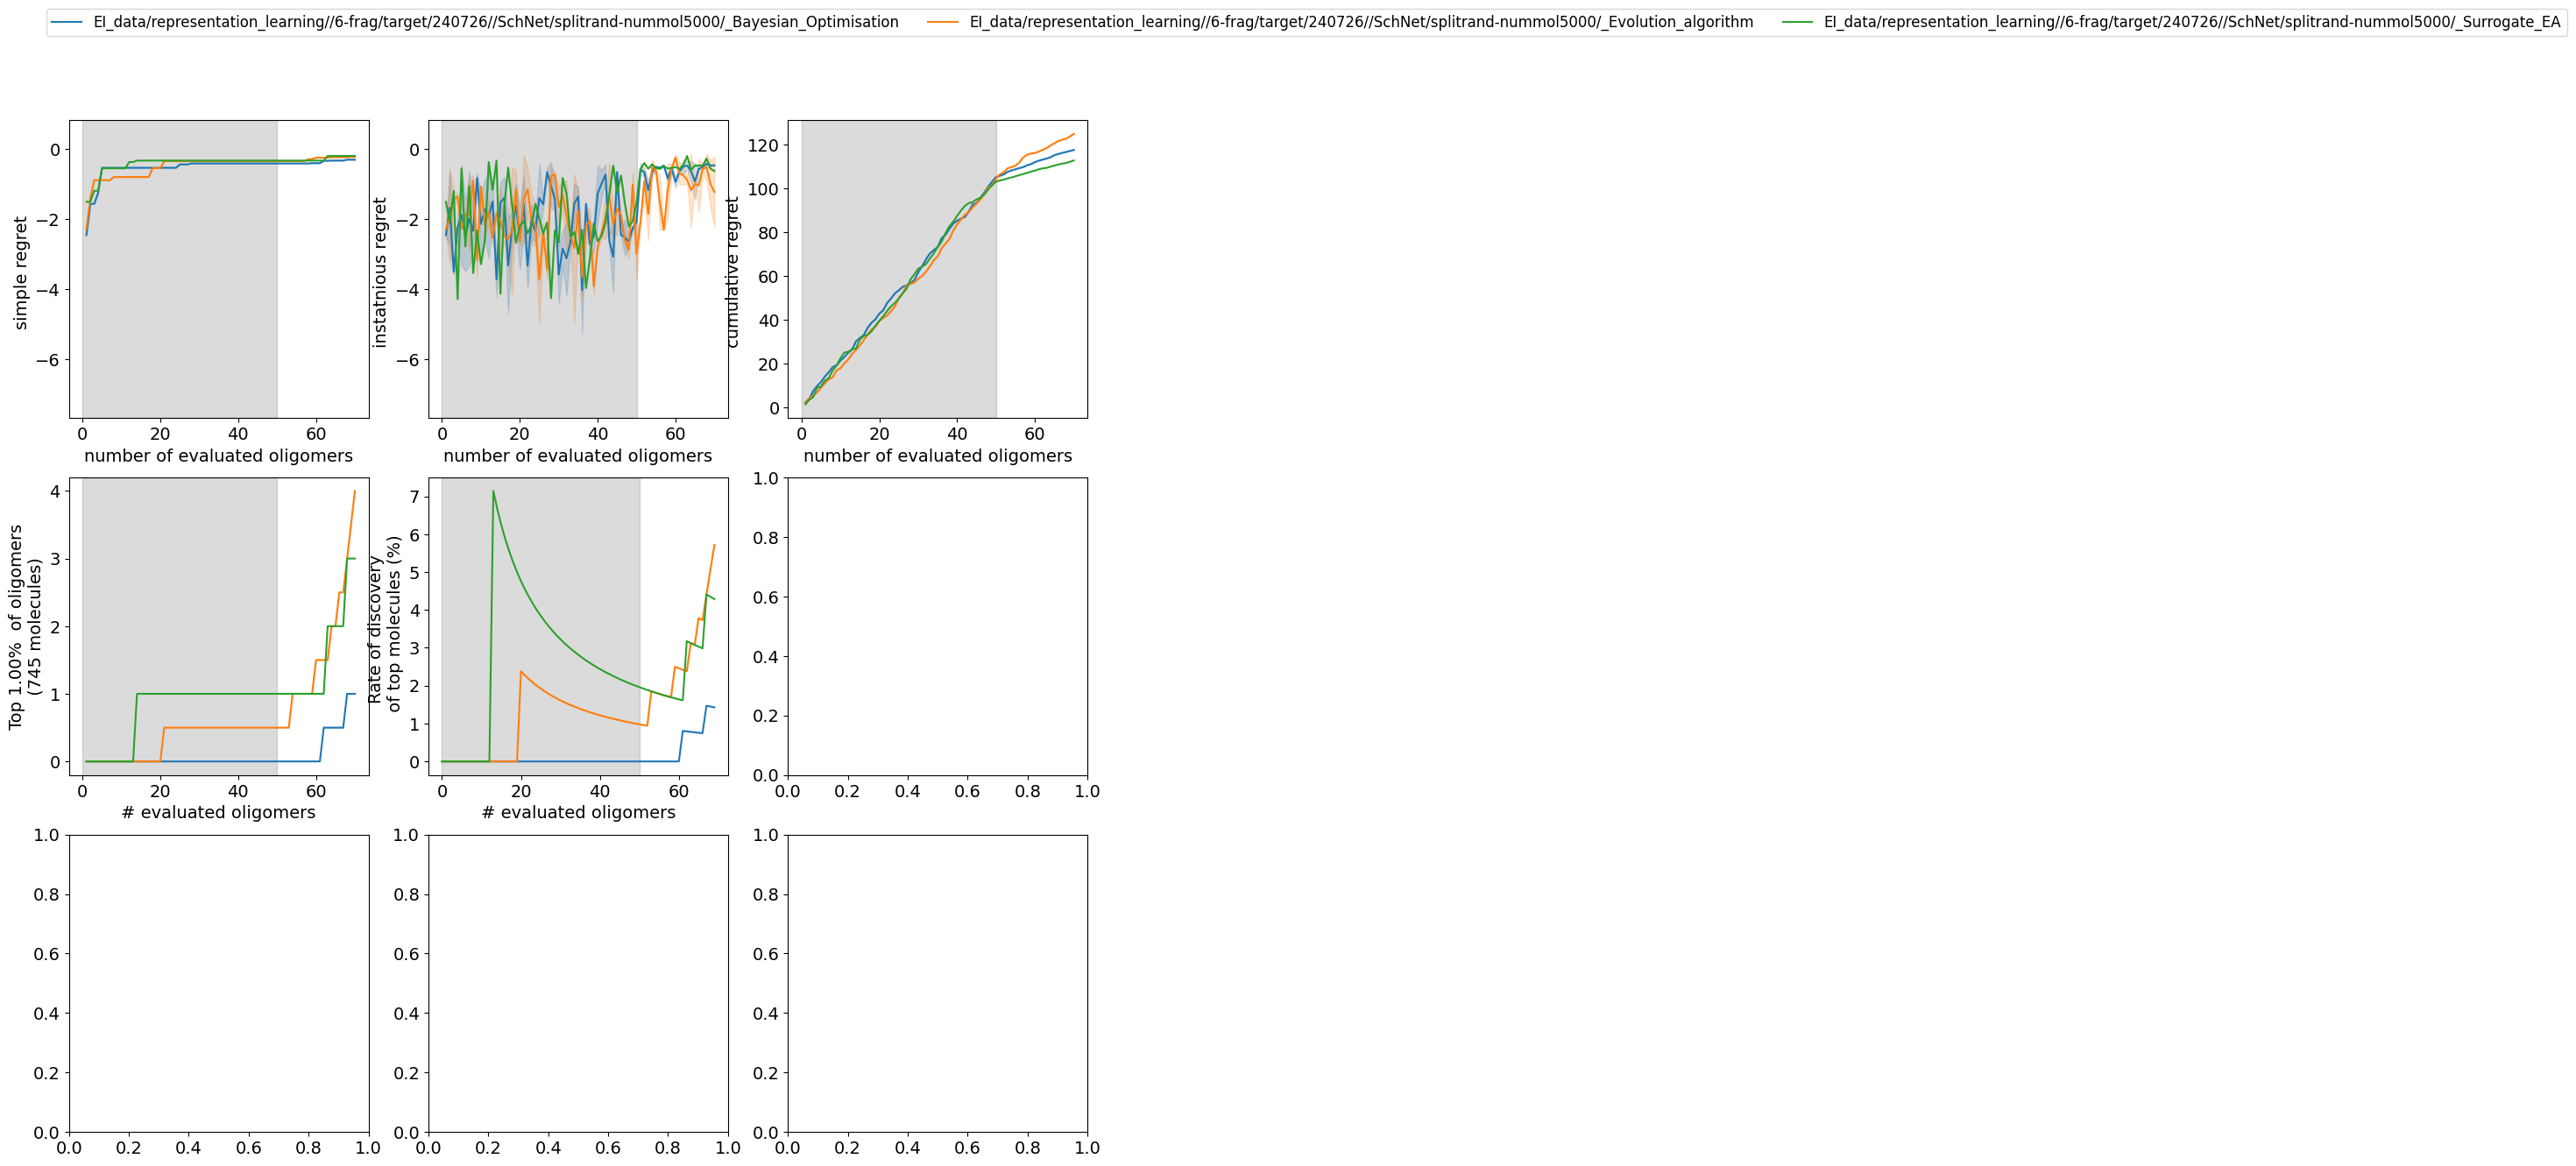

In [704]:
%matplotlib inline
df_plot = df_summary_1.copy()
df_plot = df_plot.iloc[[0,1,2]]
fig, axes,metric_dict_res = plot_results_all.plot_metric(df_plot,plot_function_list_single,results_dict,df_list,nb_iterations=70)

#axes[0].legend(df_plot['case'].values)

In [691]:
df_summary_1['key'][0].split('_')[3]

'Bayesian'